# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [87]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities

['hermanus',
 'fortuna',
 'griffith',
 'bluff',
 'oromocto',
 'avarua',
 'tuktoyaktuk',
 'chagda',
 'amderma',
 'ushuaia',
 'mahebourg',
 'ayan',
 'larsnes',
 'bowen',
 'chuy',
 'hilo',
 'tual',
 'port-gentil',
 'berlevag',
 'mataura',
 'punta arenas',
 'bredasdorp',
 'rikitea',
 'atuona',
 'caravelas',
 'saskylakh',
 'cidreira',
 'williams lake',
 'chitral',
 'port alfred',
 'hambantota',
 'malang',
 'saint-philippe',
 'palm coast',
 'verkh-usugli',
 'cheyenne',
 'hobart',
 'taburi',
 'vaini',
 'matay',
 'samusu',
 'barrow',
 'busselton',
 'arraial do cabo',
 'kapaa',
 'atasu',
 'thompson',
 'nikolskoye',
 'tommot',
 'sangar',
 'daura',
 'touros',
 'aitape',
 'vestmanna',
 'aberdeen',
 'vardo',
 'wattegama',
 'papenburg',
 'aklavik',
 'clyde river',
 'taolanaro',
 'kenai',
 'illoqqortoormiut',
 'okha',
 'teya',
 'castro',
 'albany',
 'armacao dos buzios',
 'lebu',
 'mayo',
 'gulfport',
 'dubbo',
 'tautira',
 'anadyr',
 'zhezkazgan',
 'mys shmidta',
 'salinas',
 'altay',
 'tsiroanomand

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [88]:
url = "http://api.openweathermap.org/data/2.5/weather?"
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []
city_id=[]
good_city=[]
no_city = []

units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        good_city.append(weather_response['name'])
        city_id.append(weather_response['weather'][0]['id'])
        city_id_var = weather_response['weather'][0]['id']
        print(f'{city} with id {city_id_var} was found!')
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]['lon'])
        temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        
    except KeyError:
        print(f"We can't find city: {city}.")
        if city not in no_city:
            no_city.append(city)


hermanus with id 804 was found!
fortuna with id 802 was found!
griffith with id 800 was found!
bluff with id 500 was found!
oromocto with id 800 was found!
avarua with id 801 was found!
tuktoyaktuk with id 800 was found!
We can't find city: chagda.
We can't find city: amderma.
ushuaia with id 800 was found!
mahebourg with id 803 was found!
ayan with id 803 was found!
larsnes with id 804 was found!
bowen with id 804 was found!
chuy with id 800 was found!
hilo with id 804 was found!
tual with id 500 was found!
port-gentil with id 803 was found!
berlevag with id 600 was found!
mataura with id 804 was found!
punta arenas with id 803 was found!
bredasdorp with id 803 was found!
rikitea with id 501 was found!
atuona with id 803 was found!
caravelas with id 804 was found!
saskylakh with id 800 was found!
cidreira with id 801 was found!
williams lake with id 802 was found!
chitral with id 800 was found!
port alfred with id 800 was found!
hambantota with id 800 was found!
malang with id 803 was

sibolga with id 803 was found!
alyangula with id 804 was found!
omboue with id 804 was found!
stornoway with id 803 was found!
the valley with id 803 was found!
nizhniy baskunchak with id 804 was found!
mount isa with id 802 was found!
roald with id 600 was found!
manthani with id 800 was found!
tonekabon with id 741 was found!
zaykovo with id 800 was found!
brigham city with id 804 was found!
We can't find city: abiy adi.
necochea with id 801 was found!
bandarbeyla with id 803 was found!
nhulunbuy with id 500 was found!
saldanha with id 800 was found!
teahupoo with id 500 was found!
harwich with id 804 was found!
katsuura with id 803 was found!
kaitangata with id 804 was found!
We can't find city: saleaula.
venice with id 701 was found!
flinders with id 802 was found!
sheltozero with id 802 was found!
jieshi with id 500 was found!
saint-augustin with id 601 was found!
gigmoto with id 500 was found!
passo de camaragibe with id 801 was found!
arman with id 804 was found!
faya with id 80

henties bay with id 802 was found!
novopokrovka with id 600 was found!
la ronge with id 804 was found!
rawson with id 803 was found!
akyab with id 800 was found!
llangefni with id 803 was found!
trani with id 800 was found!
bathsheba with id 801 was found!
gatesville with id 803 was found!
fort-shevchenko with id 803 was found!
praia da vitoria with id 803 was found!
price with id 804 was found!
ardesen with id 800 was found!
yelizovo with id 802 was found!
nioro with id 804 was found!
fernan-nunez with id 804 was found!
longido with id 500 was found!
kyabram with id 802 was found!
vega baja with id 804 was found!
carnarvon with id 800 was found!
caldas novas with id 800 was found!
kichera with id 600 was found!
lata with id 804 was found!
quelimane with id 803 was found!
troitskoye with id 804 was found!
wahpeton with id 801 was found!
le port with id 800 was found!
luganville with id 804 was found!
lilongwe with id 803 was found!
san clemente with id 803 was found!
tshikapa with id 8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [89]:
weather_dict = {
    "City": good_city,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)


weather_data.to_csv("Output/Weather.csv", index = False)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,20.00,83,89,2.68,ZA,1612933982
1,Fortuna,40.5982,-124.1573,7.00,100,40,1.40,US,1612933982
2,Griffith,41.5284,-87.4237,-12.00,61,1,2.29,US,1612933731
3,Bluff,-46.6000,168.3333,13.75,78,100,12.87,NZ,1612933982
4,Oromocto,45.8351,-66.4792,-14.00,66,1,2.06,CA,1612933983
...,...,...,...,...,...,...,...,...,...
569,Moranbah,-22.0016,148.0466,29.50,53,75,6.37,AU,1612934063
570,Mweka,-4.8500,21.5667,20.31,95,82,0.67,CD,1612934064
571,Husavik,66.0449,-17.3389,-5.00,93,90,2.06,IS,1612934061
572,Liverpool,53.4106,-2.9779,-1.00,69,11,4.12,GB,1612933784


In [90]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,19.453711,16.822602,9.452247,74.078397,55.233449,3.536568,1.612934e+09
std,33.486931,91.784392,18.003651,19.549707,38.700639,2.532057,8.950344e+01
min,-54.800000,-179.166700,-41.000000,13.000000,0.000000,0.050000,1.612933e+09
25%,-8.842125,-63.710700,-4.000000,65.000000,14.250000,1.655000,1.612934e+09
50%,22.852150,21.183350,15.425000,79.000000,70.000000,3.000000,1.612934e+09
75%,47.769875,98.130600,23.890000,89.000000,90.000000,4.630000,1.612934e+09
max,78.218600,178.416700,37.000000,100.000000,100.000000,14.400000,1.612934e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [91]:
weather_data[weather_data['Humidity'] > 100] 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [92]:
#  Get the indices of cities that have humidity over 100%.


In [93]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

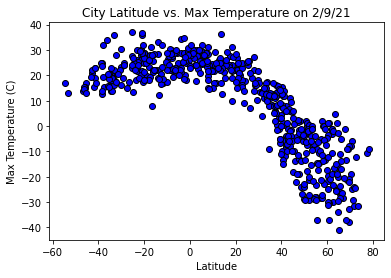

This graph is showing the relationship between latitude and maximum temperature. This graph shows that temperatures tend to be higher closer to the equator. 


In [94]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']

plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")

plt.title('City Latitude vs. Max Temperature on 2/9/21')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig("Images/LatvsTemp.png")
plt.show()

print("This graph is showing the relationship between latitude and maximum temperature. This graph shows that temperatures tend to be higher closer to the equator. ")

## Latitude vs. Humidity Plot

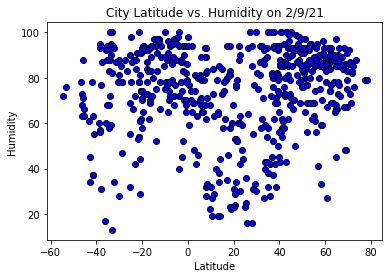

This graph is showing the relationship between latitude and humidity. This graph shows that there is not a strong relationship between latitude and humidity.


In [95]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']

plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")

plt.title('City Latitude vs. Humidity on 2/9/21')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("Images/LatvsHumidity.png")
plt.show()
print("This graph is showing the relationship between latitude and humidity. This graph shows that there is not a strong relationship between latitude and humidity.")

## Latitude vs. Cloudiness Plot

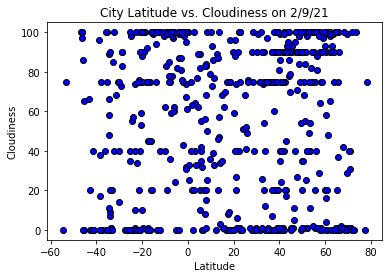

This graph is showing the relationship between latitude and cloudiness. This graph shows that there is not a strong relationship between latitude and cloudiness.


In [96]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']

plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")

plt.title('City Latitude vs. Cloudiness on 2/9/21')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("Images/LatvsClouds.png")
plt.show()
print("This graph is showing the relationship between latitude and cloudiness. This graph shows that there is not a strong relationship between latitude and cloudiness.")

## Latitude vs. Wind Speed Plot

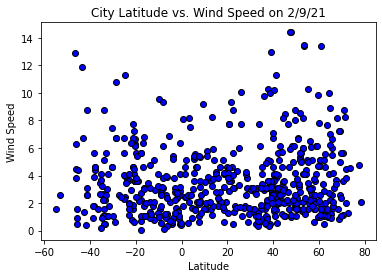

This graph is showing the relationship between latitude and wind speed. This graph shows that there is not a strong relationship between latitude and wind speed.


In [97]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']

plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")

plt.title('City Latitude vs. Wind Speed on 2/9/21')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("Images/LatvsWind.png")
plt.show()
print("This graph is showing the relationship between latitude and wind speed. This graph shows that there is not a strong relationship between latitude and wind speed.")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7557131570231276


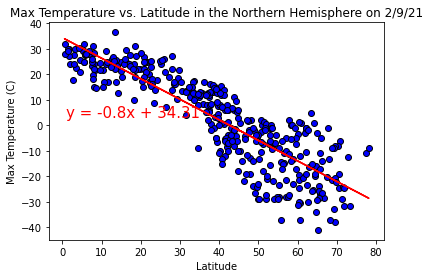

There is a strong relationship between latitude and max temperature in the Northern Hemisphere -- as the latitude approaches 0 (the equator) temperature goes up.


In [98]:
northern = pd.DataFrame(weather_data.loc[weather_data['Lat'] >= 0])

# Print out the r-squared value along with the plot.
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Max Temperature vs. Latitude in the Northern Hemisphere on 2/9/21')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/NorthernTemp.png")
plt.show()
print("There is a strong relationship between latitude and max temperature in the Northern Hemisphere -- as the latitude approaches 0 (the equator) temperature goes up.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.1924398546384274


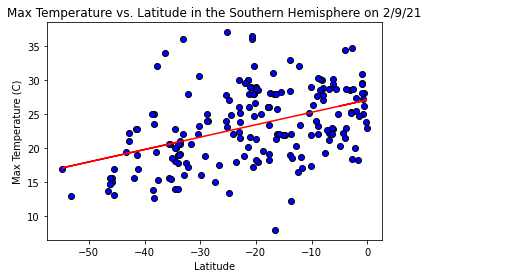

There is a weaker relationship between latitude and max temperature in the Southern Hemisphere -- less than 50%.


In [99]:
southern = pd.DataFrame(weather_data.loc[weather_data['Lat'] < 0])

# Print out the r-squared value along with the plot.
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Max Temperature vs. Latitude in the Southern Hemisphere on 2/9/21')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/SouthernTemp.png")
plt.show()
print("There is a weaker relationship between latitude and max temperature in the Southern Hemisphere -- less than 50%.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12434913451186479


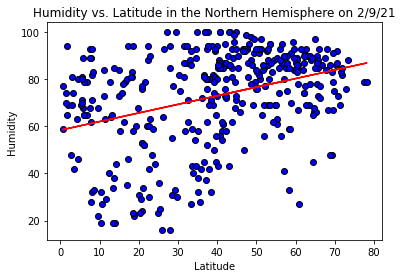

There is a a no relationship between latitude and humidity in the Northern Hemisphere.


In [100]:
northern = pd.DataFrame(weather_data.loc[weather_data['Lat'] >= 0])

# Print out the r-squared value along with the plot.
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Humidity vs. Latitude in the Northern Hemisphere on 2/9/21')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/NorthernHumidity.png")
plt.show()
print("There is a a no relationship between latitude and humidity in the Northern Hemisphere.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07460476588507442


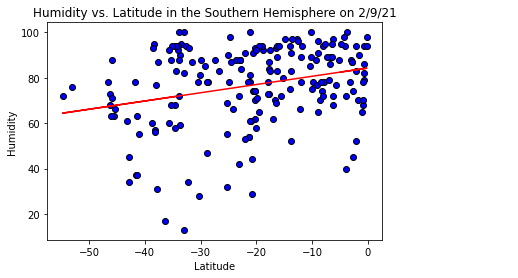

There is a no relationship between latitude and humidity in the Southern Hemisphere.


In [101]:
southern = pd.DataFrame(weather_data.loc[weather_data['Lat'] < 0])

# Print out the r-squared value along with the plot.
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Humidity vs. Latitude in the Southern Hemisphere on 2/9/21')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/SouthernHumidity.png")
plt.show()
print("There is a no relationship between latitude and humidity in the Southern Hemisphere.")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004687574332859347


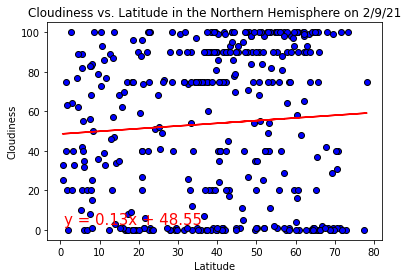

There is no relationship between latitude and cloudiness in the Northern Hemisphere.


In [102]:
northern = pd.DataFrame(weather_data.loc[weather_data['Lat'] >= 0])

# Print out the r-squared value along with the plot.
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Cloudiness vs. Latitude in the Northern Hemisphere on 2/9/21')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/NothernClouds.png")
plt.show()
print("There is no relationship between latitude and cloudiness in the Northern Hemisphere.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14254896664115865


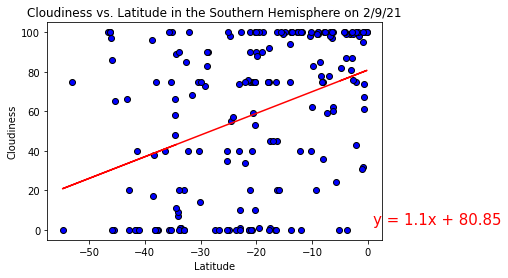

There is a no relationship between latitude and cloudiness in the Southern Hemisphere.


In [103]:
southern = pd.DataFrame(weather_data.loc[weather_data['Lat'] < 0])

# Print out the r-squared value along with the plot.
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Cloudiness vs. Latitude in the Southern Hemisphere on 2/9/21')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/SouthernClouds.png")
plt.show()
print("There is a no relationship between latitude and cloudiness in the Southern Hemisphere.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006893778161899031


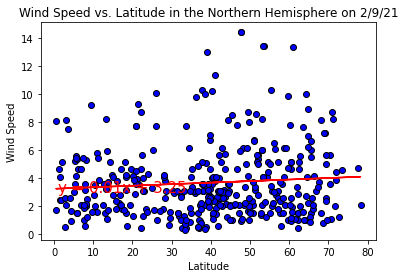

There is no relationship between latitude and wind speed in the Northern Hemisphere.


In [104]:
northern = pd.DataFrame(weather_data.loc[weather_data['Lat'] >= 0])

# Print out the r-squared value along with the plot.
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Wind Speed vs. Latitude in the Northern Hemisphere on 2/9/21')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/NorthernWind.png")
plt.show()
print("There is no relationship between latitude and wind speed in the Northern Hemisphere.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.033660649251747374


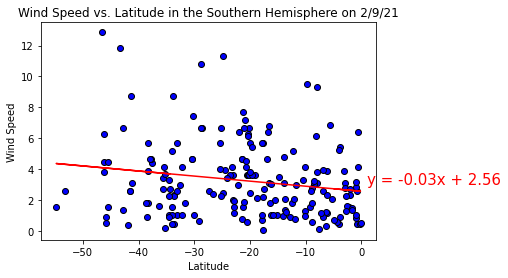

There is no relationship between latitude and win speed in the Southern Hemisphere.


In [105]:
southern = pd.DataFrame(weather_data.loc[weather_data['Lat'] < 0])

# Print out the r-squared value along with the plot.
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Wind Speed vs. Latitude in the Southern Hemisphere on 2/9/21')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/SouthernWind.png")
plt.show()
print("There is no relationship between latitude and win speed in the Southern Hemisphere.")
